In [1]:
# Import the dependencies.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import time
import gmaps

from citipy import citipy
from datetime import datetime
from scipy import stats
from scipy.stats import linregress

from config import weather_api_key
from config import g_key

# Get the start time for computation.
start = time.time()

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80026ba215c9965e6260663fff8da556


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
print(f"There are {len(cities)} cities in the list.")

There are 617 cities in the list.


In [5]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kodiak
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | nagua
Processing Record 4 of Set 1 | carutapera
Processing Record 5 of Set 1 | golcuv jenikov
Processing Record 6 of Set 1 | oussouye
Processing Record 7 of Set 1 | rungata
City not found. Skipping...
Processing Record 8 of Set 1 | san quintin
Processing Record 9 of Set 1 | atuona
Processing Record 10 of Set 1 | sao jose da coroa grande
Processing Record 11 of Set 1 | nome
Processing Record 12 of Set 1 | qaanaaq
Processing Record 13 of Set 1 | zyryanka
Processing Record 14 of Set 1 | kaeo
Processing Record 15 of Set 1 | cidreira
Processing Record 16 of Set 1 | bathsheba
Processing Record 17 of Set 1 | nizhnevartovsk
Processing Record 18 of Set 1 | leningradskiy
Processing Record 19 of Set 1 | fontaine
Processing Record 20 of Set 1 | castro
Processing Record 21 of Set 1 | hilo
Processing Record 22 of Set 1 | barrow
Proces

Processing Record 37 of Set 4 | gueugnon
Processing Record 38 of Set 4 | airai
Processing Record 39 of Set 4 | kananga
Processing Record 40 of Set 4 | kruisfontein
Processing Record 41 of Set 4 | kyshtovka
Processing Record 42 of Set 4 | wuxue
Processing Record 43 of Set 4 | suzhou
Processing Record 44 of Set 4 | dikson
Processing Record 45 of Set 4 | launceston
Processing Record 46 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 47 of Set 4 | nikolskoye
Processing Record 48 of Set 4 | dhidhdhoo
Processing Record 49 of Set 4 | borogontsy
Processing Record 50 of Set 4 | tasiilaq
Processing Record 1 of Set 5 | santa rosa
Processing Record 2 of Set 5 | longyearbyen
Processing Record 3 of Set 5 | carnarvon
Processing Record 4 of Set 5 | paucartambo
City not found. Skipping...
Processing Record 5 of Set 5 | denau
City not found. Skipping...
Processing Record 6 of Set 5 | pisco
Processing Record 7 of Set 5 | cape town
Processing Record 8 of Set 5 | maromitsa
Processing R

Processing Record 25 of Set 8 | marcona
City not found. Skipping...
Processing Record 26 of Set 8 | ballina
Processing Record 27 of Set 8 | mbarara
Processing Record 28 of Set 8 | formoso do araguaia
City not found. Skipping...
Processing Record 29 of Set 8 | lavrentiya
Processing Record 30 of Set 8 | buchanan
Processing Record 31 of Set 8 | saint anthony
Processing Record 32 of Set 8 | san borja
Processing Record 33 of Set 8 | shestakovo
Processing Record 34 of Set 8 | chagda
City not found. Skipping...
Processing Record 35 of Set 8 | abu samrah
Processing Record 36 of Set 8 | kumluca
Processing Record 37 of Set 8 | lisakovsk
Processing Record 38 of Set 8 | klaksvik
Processing Record 39 of Set 8 | tocache
Processing Record 40 of Set 8 | hailar
Processing Record 41 of Set 8 | victoria
Processing Record 42 of Set 8 | sai buri
Processing Record 43 of Set 8 | kalmunai
Processing Record 44 of Set 8 | fort nelson
Processing Record 45 of Set 8 | yeppoon
Processing Record 46 of Set 8 | skibbe

Processing Record 16 of Set 12 | lakes entrance
Processing Record 17 of Set 12 | fort frances
Processing Record 18 of Set 12 | sola
Processing Record 19 of Set 12 | mecca
Processing Record 20 of Set 12 | eatonton
Processing Record 21 of Set 12 | tymovskoye
Processing Record 22 of Set 12 | freeport
Processing Record 23 of Set 12 | vanimo
Processing Record 24 of Set 12 | koslan
Processing Record 25 of Set 12 | bara
Processing Record 26 of Set 12 | maltahohe
Processing Record 27 of Set 12 | bagaces
Processing Record 28 of Set 12 | zhanjiang
Processing Record 29 of Set 12 | kang
Processing Record 30 of Set 12 | tyukalinsk
Processing Record 31 of Set 12 | kushiro
Processing Record 32 of Set 12 | cabedelo
Processing Record 33 of Set 12 | chalmette
Processing Record 34 of Set 12 | oranjemund
Processing Record 35 of Set 12 | poya
Processing Record 36 of Set 12 | ambilobe
Processing Record 37 of Set 12 | kalundborg
Processing Record 38 of Set 12 | banikoara
Processing Record 39 of Set 12 | beng

In [6]:
# Convert the array of dictionaries to a Pandas DataFrame and reorder the columns.
city_data_df = pd.DataFrame(city_data)
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kodiak,US,2022-04-08 02:05:53,57.7900,-152.4072,33.31,80,100,16.11
1,Mataura,NZ,2022-04-08 02:05:53,-46.1927,168.8643,55.83,68,76,12.33
2,Nagua,DO,2022-04-08 02:05:53,19.3832,-69.8474,74.34,87,0,9.17
3,Carutapera,BR,2022-04-08 02:05:54,-1.1950,-46.0200,75.29,94,99,5.82
4,Golcuv Jenikov,CZ,2022-04-08 02:05:54,49.8163,15.4769,45.75,52,0,19.57
5,Oussouye,SN,2022-04-08 02:05:54,12.4850,-16.5469,73.58,64,84,4.23
6,San Quintin,MX,2022-04-08 02:05:55,30.4833,-115.9500,72.93,43,0,5.30
7,Atuona,PF,2022-04-08 02:05:55,-9.8000,-139.0333,79.39,75,7,15.21
8,Sao Jose Da Coroa Grande,BR,2022-04-08 02:05:55,-8.8978,-35.1478,78.04,84,12,3.47
9,Nome,US,2022-04-08 02:02:45,64.5011,-165.4064,0.16,55,75,9.22


In [7]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [8]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

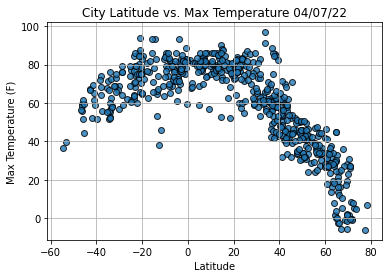

In [9]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


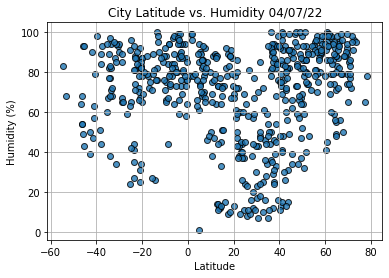

In [10]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

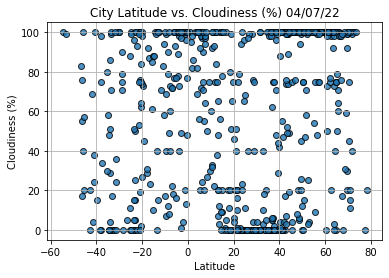

In [11]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

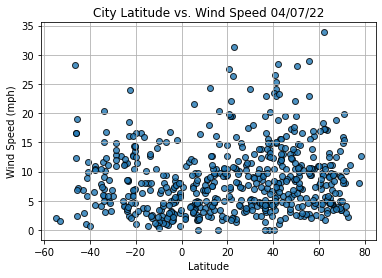

In [12]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [13]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = stats.linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(label=title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [14]:
index13 = city_data_df.loc[13]
index13

City                     Cidreira
Country                        BR
Date          2022-04-08 02:05:57
Lat                      -30.1811
Lng                      -50.2056
Max Temp                    69.08
Humidity                       90
Cloudiness                    100
Wind Speed                   6.85
Name: 13, dtype: object

In [15]:
city_data_df["Lat"] >=0

0       True
1      False
2       True
3      False
4       True
       ...  
568    False
569    False
570    False
571     True
572     True
Name: Lat, Length: 573, dtype: bool

In [16]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kodiak,US,2022-04-08 02:05:53,57.7900,-152.4072,33.31,80,100,16.11
2,Nagua,DO,2022-04-08 02:05:53,19.3832,-69.8474,74.34,87,0,9.17
4,Golcuv Jenikov,CZ,2022-04-08 02:05:54,49.8163,15.4769,45.75,52,0,19.57
5,Oussouye,SN,2022-04-08 02:05:54,12.4850,-16.5469,73.58,64,84,4.23
6,San Quintin,MX,2022-04-08 02:05:55,30.4833,-115.9500,72.93,43,0,5.30


In [17]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

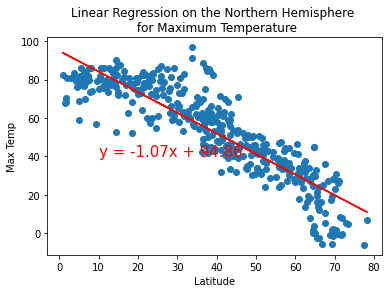

<Figure size 432x288 with 0 Axes>

In [18]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Northern Hemisphere \n for Maximum Temperature",
                       'Max Temp',
                       (10,40))

# Save the figure.
plt.savefig("weather_data/Fig5.png")

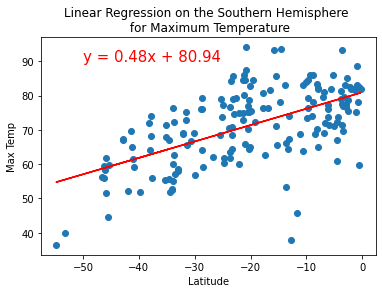

<Figure size 432x288 with 0 Axes>

In [19]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Southern Hemisphere \n for Maximum Temperature",
                       'Max Temp',
                       (-50,90))

# Save the figure.
plt.savefig("weather_data/Fig6.png")

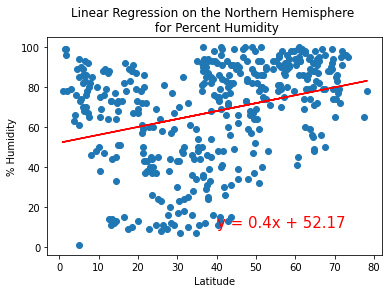

<Figure size 432x288 with 0 Axes>

In [20]:
# Linear regression on the Northern Hemisphere for humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Northern Hemisphere \n for Percent Humidity',
                       '% Humidity',
                       (40,10))

# Save the figure.
plt.savefig("weather_data/Fig7.png")

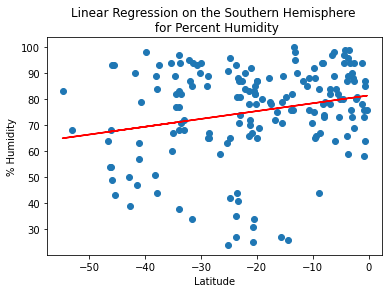

<Figure size 432x288 with 0 Axes>

In [21]:
# Linear regression on the Southern Hemisphere for humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Southern Hemisphere \n for Percent Humidity',
                       '% Humidity',
                       (-50,15))

# Save the figure.
plt.savefig("weather_data/Fig8.png")

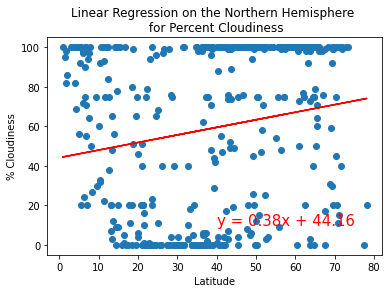

<Figure size 432x288 with 0 Axes>

In [22]:
# Linear regression on the Northern Hemisphere for cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Northern Hemisphere \n for Percent Cloudiness',
                       '% Cloudiness',
                       (40,10))

# Save the figure.
plt.savefig("weather_data/Fig9.png")

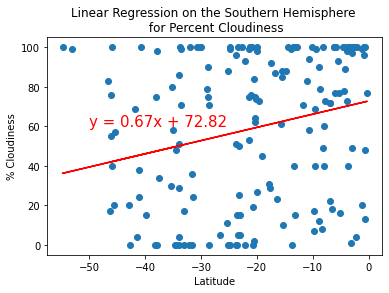

<Figure size 432x288 with 0 Axes>

In [23]:
# Linear regression on the Southern Hemisphere for cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Southern Hemisphere \n for Percent Cloudiness',
                       '% Cloudiness',
                       (-50,60))

# Save the figure.
plt.savefig("weather_data/Fig10.png")

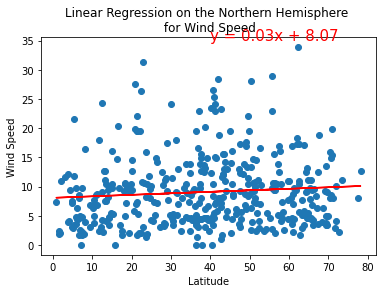

<Figure size 432x288 with 0 Axes>

In [24]:
# Linear regression on the Northern Hemisphere for wind speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed',
                       'Wind Speed',
                       (40,35))

# Save the figure.
plt.savefig("weather_data/Fig11.png")

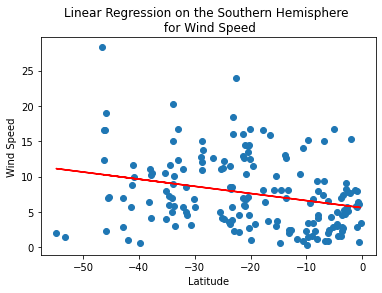

<Figure size 432x288 with 0 Axes>

In [25]:
# Linear regression on the Southern Hemisphere for wind speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed',
                       'Wind Speed',
                       (-50,35))

# Save the figure.
plt.savefig("weather_data/Fig12.png")

In [26]:
# Display total computational time.
end = time.time()
total_time = end - start
seconds = total_time % 3600
minutes = seconds // 60
seconds %= 60
print(f"Total time elapsed = {minutes:.0f} minutes {seconds:.0f} seconds")

Total time elapsed = 2 minutes 55 seconds
